# Reflexivity in a diffusion of innovations model

This code tries to replicate the diffusion of innovations model present in

> *Diffusion dynamics in small-world networks with heterogeneous consumers* from Delre, Sebastiano A., Jager, Wander and Janssen, Marco A., Computational and Mathematical Organization Theory, **13**, 2, 2007.

with some modifications.

It also adds new features that try to introduce reflexivity in it.

In [2]:
# Necessary libraries

from __future__ import division

# 3rd party imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
%matplotlib inline

In [26]:
matplotlib.rc('text', usetex=True)

In [4]:
#plt.style.use('seaborn-paper')
sns.set_style("whitegrid")

In [5]:
from algorithm import compute_run

## 1. Running the model

### 1.1 Parameters

These are main parameters that control the evolution of the algorithm, and their corresponding variable in the article:

* Network randomness: $r$
* Average number of neighbors: $k$
* Initial proportion (or seed) of adopters: $\delta$
* Coefficient of social influence: $\beta$
* Threshold of adopters among neighbors: $h$
* Quality: $q$
* Total number of consumers: $N$
* Activation sharpness: $\phi$
* Critical mass of adopters: $M_{c}$

----

* Marketing effort: $e_{1}$
* Level: $L$

In [6]:
parameters = dict(
    randomness = 0.01,
    number_of_neighbors = 30,
    initial_seed = 0.001,
    adopters_threshold = 0.3,
    social_influence = 0.7,
    quality = 0.5,
    number_of_consumers = 1000,
    activation_sharpness = 20,
    critical_mass = 0.85,
    marketing_effort = 0,
    level = 1
    #minimal_utility = 0.5,
)

### 1.2 Simulation

#### 1.2.1 Full run

In [7]:
data = compute_run(30, parameters, max_time=100)

{'number_of_consumers': 1000, 'social_influence': 0.7, 'randomness': 0.01, 'activation_sharpness': 20, 'level': 1, 'quality': 0.5, 'initial_seed': 0.001, 'critical_mass': 0.85, 'number_of_neighbors': 30, 'adopters_threshold': 0.3, 'marketing_effort': 0}


#### 1.2.2 Single run

In [189]:
G = generate_initial_conditions(parameters)

In [94]:
parameters['reflexivity'] = False
set_seed(G, parameters, reset=True)
adopters_no_rx = evolution(G, parameters, max_time=20)

In [96]:
parameters['reflexivity'] = True
set_seed(G, parameters, reset=True)
adopters_rx = evolution(G, parameters, max_time=20)

## 2. Plots

### 2.1 2d plots

#### 2.1.1 Full run

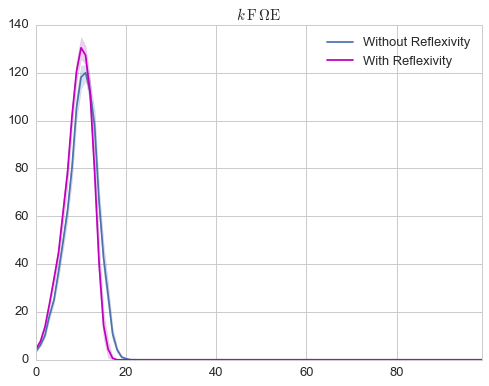

In [8]:
plt.figure(figsize=(8, 6))
sns.tsplot(data=data[0], condition='Without Reflexivity')
sns.tsplot(data=data[1], color='m', condition='With Reflexivity')
plt.title(r'$k = %s$' % parameters['number_of_neighbors'], fontsize=15)
plt.legend(loc='upper right', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)

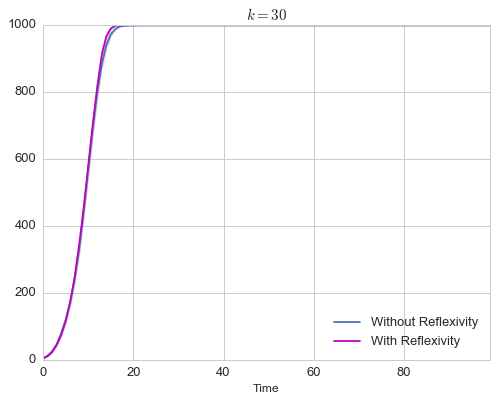

In [292]:
# Plot the cumulative sum of adopters and non-adopters (the usual diffusion curve)
plt.figure(figsize=(8, 6))
sns.tsplot(data=map(np.cumsum, data[0]), condition='Without Reflexivity')
sns.tsplot(data=map(np.cumsum, data[1]), color='m', condition='With Reflexivity')
plt.title(r'$k = %s$' % parameters['number_of_neighbors'], fontsize=15)
plt.xlabel("Time", fontsize=12)
plt.legend(loc='lower right', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)

#### 2.1.2 Single run

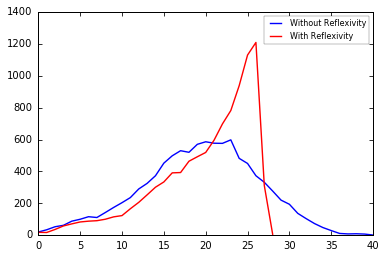

In [460]:
plt.plot(adopters_no_rx, 'b', label='Without Reflexivity')
plt.plot(adopters_rx, 'r', label='With Reflexivity')
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10)

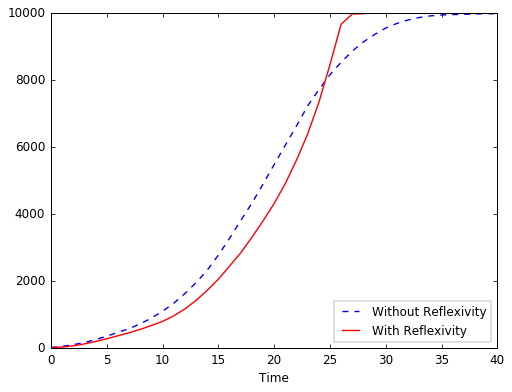

In [472]:
# Plot the cumulative sum of adopters and non-adopters (the usual diffusion curve)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(adopters_no_rx), '--', color='b', label='Without Reflexivity')
plt.plot(np.cumsum(adopters_rx), color='r', label='With Reflexivity')
plt.xlabel("Time", fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

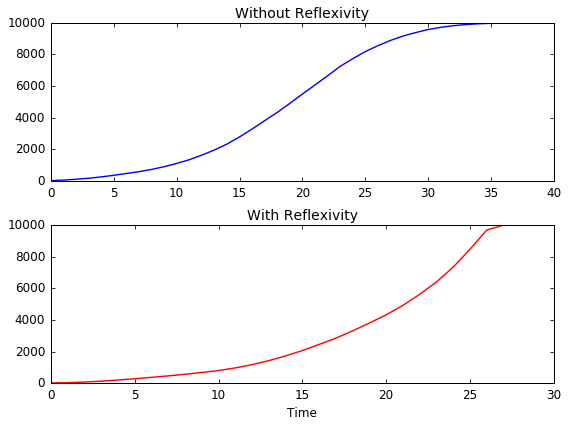

In [473]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
#fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14, 4))
plt.plot(np.cumsum(adopters_no_rx), 'b')
plt.title('Without Reflexivity', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2, 1, 2)
plt.plot(np.cumsum(adopters_rx), 'r')
plt.title('With Reflexivity', fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

In [ ]:
# Perform the evolution of a single realization until there is
# complete adoption
print(parameters)
G = generate_initial_conditions(10000, parameters)
indexes = evolution(G, parameters, compute_index=True)

In [ ]:
plt.plot(indexes)

### 2.2 Logistic function form

This explores how the logistic function changes under different values of $k$ and $x_{0}$

In [55]:
from sympy import plot, symbols, exp

In [56]:
x = symbols('x')

In [474]:
def symbolic_logistic(x, k, x0):
    return 1 / ( 1 + exp(-k * (x - x0)) )

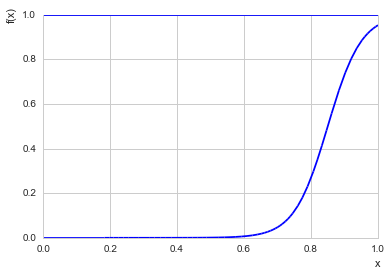

In [297]:
plot(symbolic_logistic(x, 20, 0.85), 1, (x, 0, 1))

In [476]:
symbolic_logistic(1, 15, 0.8)

0.952574126822433

### 2.3 Animations

In [ ]:
%matplolib qt

In [ ]:
import matplotlib.animation as animation

In [ ]:
G = generate_initial_conditions(1000, parameters)

In [ ]:
# Plot an animation of the evolution
fig = plt.figure()
positions = nx.spring_layout(G)
animation.FuncAnimation(fig, lambda i: animate(i, G, positions, parameters, test=False),
                        frames=500, interval=3, repeat=False)